In [58]:
import warnings
warnings.filterwarnings("ignore")

In [59]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [60]:
# Loading the csv data to a Pandas DataFrame
diabetes_dataset = pd.read_csv('diabetes.csv')
diabetes_dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [61]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [62]:
# getting some info about the data
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [63]:
# checking for missing values
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [64]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [65]:
# Splitting the data into features (x) and target (y)
x = diabetes_dataset.drop(columns = 'Outcome', axis=1)
y = diabetes_dataset['Outcome']

In [66]:
# Checking the count of target variable classes
print(y.value_counts())

0    500
1    268
Name: Outcome, dtype: int64


In [67]:
# Performing SMOTE oversampling to balance the classes
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X, Y = smote.fit_resample(x, y)

# Checking the count of target variable classes after oversampling
print(Y.value_counts())

1    500
0    500
Name: Outcome, dtype: int64


In [68]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [70]:
print(X.shape, X_train.shape, X_test.shape)

(1000, 8) (800, 8) (200, 8)


In [71]:
# Importing necessary libraries for model evaluation and selection
from sklearn.model_selection import cross_val_score, KFold

# Importing different classification models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Creating a list of models to evaluate
models = []
models.append(('DTC', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier()))

# Evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "For %s Model: Mean accuracy is %f " % (name, cv_results.mean())
    print(msg)

For DTC Model: Mean accuracy is 0.745000 
For SVM Model: Mean accuracy is 0.720000 
For LR Model: Mean accuracy is 0.721250 
For NB Model: Mean accuracy is 0.717500 
For KNN Model: Mean accuracy is 0.736250 
For RF Model: Mean accuracy is 0.795000 


In [72]:
# Make predictions on the validation dataset and evaluate the models
from sklearn.metrics import classification_report
best_accuracy = 0
best_model = None

for name, model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(Y_test, predictions)
    print("\nModel:", name)
    print("Test Accuracy score:", accuracy)
    print("Classification report:\n", classification_report(Y_test, predictions))
    
    # Check if current model has higher accuracy than the previous best model
    if accuracy > best_accuracy:
        best_model = name
        best_accuracy = accuracy

print("Best Model:", best_model)


Model: DTC
Test Accuracy score: 0.795
Classification report:
               precision    recall  f1-score   support

           0       0.81      0.77      0.79       100
           1       0.78      0.82      0.80       100

    accuracy                           0.80       200
   macro avg       0.80      0.79      0.79       200
weighted avg       0.80      0.80      0.79       200


Model: SVM
Test Accuracy score: 0.74
Classification report:
               precision    recall  f1-score   support

           0       0.72      0.79      0.75       100
           1       0.77      0.69      0.73       100

    accuracy                           0.74       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.74      0.74      0.74       200


Model: LR
Test Accuracy score: 0.735
Classification report:
               precision    recall  f1-score   support

           0       0.72      0.77      0.74       100
           1       0.75      0.70      0.73       

In [89]:
# Train the best model on the entire training data
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [90]:
# Accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

Here the accuracy on training data is 1 and testing set is 0.83 which is clearly overfitting i.e. model is memorising rather than finding logic, but this is the only model having highest recall value which is most important for a diesease prediction models.

In [91]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  1.0


In [92]:
# Accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [93]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.81


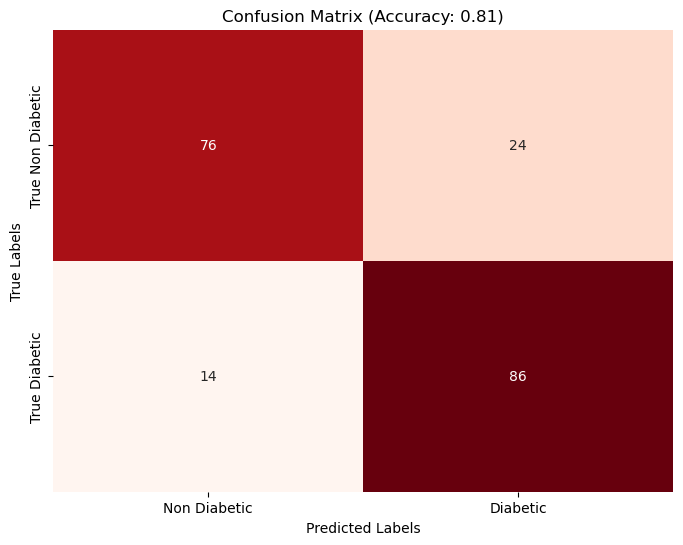

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_test, X_test_prediction)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Non Diabetic', 'Diabetic'],
            yticklabels=['True Non Diabetic', 'True Diabetic'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix (Accuracy: {test_data_accuracy:.2f})')
plt.show()

In [ ]:
# Save the trained model to a file
import pickle
filename = 'diabetes_disease_model_RandomForestClassifier.sav'
pickle.dump(model, open(filename, 'wb'))